In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn.isotonic import IsotonicRegression

%matplotlib inline


In [2]:
trainv=pd.read_csv('train_values_oAriVNN.csv')
trainv.dtypes

row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                   

In [3]:
trainl=pd.read_csv('train_labels.csv')
trainl.head(25)

,row_id,evictions
0,0,681
1,1,0
2,2,29
3,3,841
4,4,2
5,5,4191
6,6,24
7,7,225
8,8,93
9,9,6


In [4]:
results1=trainv.merge(trainl,on='row_id')
results1.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2


In [5]:

xx=pd.read_csv('merge1.csv')
xx.dtypes

row_id                                          int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                                  float64
pct_other                   

In [6]:
print(results1.shape)

(2546, 49)


In [7]:
data=results1.fillna(value=0)
print(data.shape)

(2546, 49)


In [8]:
data.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2


In [9]:
data.drop(["row_id","county_code","state"], axis=1, inplace=True)
data.head()

,year,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,b,45009.0,6944.0,37.218,643.0,33315.0,98494.0,33.389,0.412070,0.493459,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,a,9872.0,1224.0,31.773,517.0,43724.0,85444.0,26.477,0.838682,0.015588,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,b,17625.0,1725.0,21.973,671.0,37777.0,136162.0,32.500,0.873733,0.041040,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,a,134136.0,18180.0,36.809,603.0,30607.0,70062.0,31.959,0.264083,0.240836,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,a,6936.0,551.0,17.627,668.0,44237.0,187066.0,29.339,0.924502,0.005146,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2


In [10]:
print(data['rucc'].unique())
Features_o = data['rucc']
enc = preprocessing.LabelEncoder()
enc.fit(Features_o)
Features_o = enc.transform(Features_o)
print(Features_o)

['Nonmetro - Urban population of 20,000 or more, adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area'
 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area'
 'Metro - Counties in metro areas of 250,000 to 1 million population'
 'Metro - Counties in metro areas of 1 million population or more'
 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area'
 'Metro - Counties in metro areas of fewer than 250,000 population'
 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area']
[7 5 3 ... 2 5 1]


In [11]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features_o.reshape(-1,1))
Features_o = encoded.transform(Features_o.reshape(-1,1)).toarray()
Features_o[:10,:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['urban_influence', 'economic_typology','year']

for col in categorical_columns:
    temp = encode_string(data[col])
    Features_o = np.concatenate([Features_o, temp], axis = 1)

print(Features_o.shape)
print(Features_o[:2, :])  

(2546, 29)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 1. 0.]]


In [13]:
Features_o = np.concatenate([Features_o, np.array(data[["population", "renter_occupied_households", "pct_renter_occupied", "pct_asian","median_gross_rent", "pct_adults_bachelors_or_higher", "pct_af_am", "pct_other", "birth_rate_per_1k", "median_property_value", "homicides_per_100k", "rent_burden", "pct_hispanic", "median_household_income","pct_female", "pct_below_18_years_of_age", "pct_civilian_labor", "pct_multiple", "pct_low_birthweight", "pct_uninsured_adults", "poverty_rate", "pct_nh_pi", "pct_excessive_drinking", "pct_unemployment", "pct_adults_with_some_college", "air_pollution_particulate_matter_value", "pct_uninsured_children", "pct_am_ind", "pct_adults_less_than_a_high_school_diploma", "heart_disease_mortality_per_100k", "pct_diabetes", "pct_adult_obesity", "pop_per_primary_care_physician", "pct_adult_smoking", "pct_physical_inactivity", "pop_per_dentist", "death_rate_per_1k", "motor_vehicle_crash_deaths_per_100k", "pct_aged_65_years_and_older", "pct_white", "pct_adults_with_high_school_diploma"
]])], axis = 1)
Features_o[:2,:]
print(Features_o.shape)

(2546, 70)


In [14]:
from sklearn import feature_selection as fs
print(Features_o.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
Features_reduced = sel.fit_transform(Features_o)

## Print the support and shape for the transformed features
print(sel.get_support())
print(Features_reduced.shape)

(2546, 70)
[False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False  True False  True  True  True  True  True False  True False False
 False  True  True  True  True False  True False False False False False
 False  True False False False False  True False False False  True False
 False  True False False  True  True  True False False False]
(2546, 20)


In [15]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(data['evictions'])
indx = range(Features_reduced.shape[0])
indx = ms.train_test_split(indx, test_size = 750)
x_train = Features_reduced[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features_reduced[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [16]:
### 14->10 ->3
scaler = preprocessing.StandardScaler().fit(x_train[:,3:])
x_train[:,3:] = scaler.transform(x_train[:,3:])
x_test[:,3:] = scaler.transform(x_test[:,3:])
print(x_train.shape)
x_train[:2,:]

(1796, 20)


array([[ 1.        ,  0.        ,  1.        , -0.99223505, -0.14316188,
        -0.11987451,  1.24245662, -0.14965309,  1.81587327, -0.06897741,
         0.14350255, -0.71212119,  0.30406428, -0.09055438, -0.05276403,
        -1.37823948, -0.35610973, -0.73391779, -0.72285342, -0.65446196],
       [ 0.        ,  0.        ,  0.        ,  1.00782572, -0.30406286,
        -0.26170895,  0.50295569, -0.52610689, -1.75810027,  0.0114345 ,
        -0.52598344, -1.76638136, -0.08118734, -0.63047428,  0.45459518,
         0.2574449 ,  0.08901589,  0.85816901, -0.35674243,  2.31173528]])

In [17]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False, normalize=True)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

In [18]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[  70.41243351  -96.73993877  827.96555766  420.41972713  867.7291706
  370.31672739   90.12285776   42.89097875   -4.94307298 -315.45871983
  170.77622019   34.40911577   29.94108096  -85.81042471   45.25118227
  -32.97962927  -13.4861174   -19.01071756  -36.76041636  -11.19542495]


In [19]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 44) 

Mean Square Error      = 547069.2467872464
Root Mean Square Error = 739.6412960261524
Mean Absolute Error    = 306.62826789565395
Median Absolute Error  = 147.7284802274777
R^2                    = 0.6074720158935809
Adjusted R^2           = 0.5835645041137282


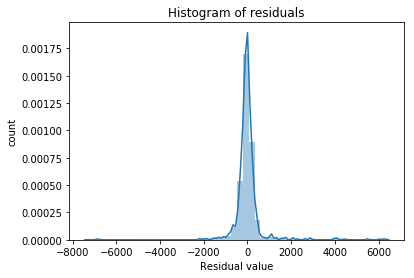

In [20]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

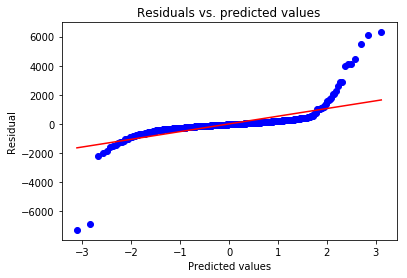

In [21]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)

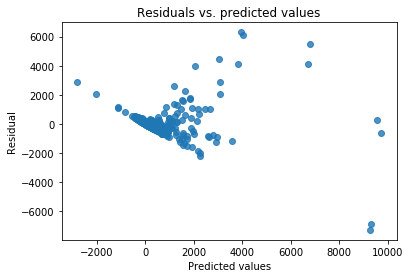

In [22]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

In [23]:
test1=pd.read_csv('test_values.csv')
test1.drop(["row_id","county_code","state"], axis=1, inplace=True)

print(test1.shape)

(2420, 45)


In [24]:
test=test1.fillna(value=0)
print(test.shape)

(2420, 45)


In [25]:
print(test['rucc'].unique())
Features_o1 = test['rucc']
enc = preprocessing.LabelEncoder()
enc.fit(Features_o1)
Features_o1 = enc.transform(Features_o1)
print(Features_o1)

['Metro - Counties in metro areas of fewer than 250,000 population'
 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area'
 'Metro - Counties in metro areas of 250,000 to 1 million population'
 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area'
 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area'
 'Metro - Counties in metro areas of 1 million population or more'
 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area'
 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area']
[2 2 4 ... 7 1 2]


In [26]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features_o1.reshape(-1,1))
Features_o1 = encoded.transform(Features_o1.reshape(-1,1)).toarray()
Features_o1[:10,:]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [27]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['urban_influence', 'economic_typology',"year"]

for col in categorical_columns:
    temp = encode_string(test[col])
    Features_o1 = np.concatenate([Features_o1, temp], axis = 1)

print(Features_o1.shape)
print(Features_o1[:2, :]) 

(2420, 29)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 1.]]


In [28]:
Features_o1 = np.concatenate([Features_o1, np.array(test[["population", "renter_occupied_households", "pct_renter_occupied", "pct_asian","median_gross_rent", "pct_adults_bachelors_or_higher", "pct_af_am", "pct_other", "birth_rate_per_1k", "median_property_value", "homicides_per_100k", "rent_burden", "pct_hispanic", "median_household_income","pct_female", "pct_below_18_years_of_age", "pct_civilian_labor", "pct_multiple", "pct_low_birthweight", "pct_uninsured_adults", "poverty_rate", "pct_nh_pi", "pct_excessive_drinking", "pct_unemployment", "pct_adults_with_some_college", "air_pollution_particulate_matter_value", "pct_uninsured_children", "pct_am_ind", "pct_adults_less_than_a_high_school_diploma", "heart_disease_mortality_per_100k", "pct_diabetes", "pct_adult_obesity", "pop_per_primary_care_physician", "pct_adult_smoking", "pct_physical_inactivity", "pop_per_dentist", "death_rate_per_1k", "motor_vehicle_crash_deaths_per_100k", "pct_aged_65_years_and_older", "pct_white", "pct_adults_with_high_school_diploma"
]])], axis = 1)
Features_o1[:2,:]

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.71046000e+05, 1.73420000e+04, 2.53100000e+01,
        5.13487813e-03, 6.72000000e+02, 1.83734940e-01, 1.36739903e-01,
        3.00285271e-04, 1.22384616e+01, 9.93530000e+04, 2.90000000e+00,
        3.47380000e+01, 5.18692758e-02, 4.28280000e+04, 5.09000000e-01,
        2.39000000e-01, 4.44000000e-01, 3.13898203e-02, 9.10000000e-02,
        1.71000000e-01, 1.45720000e+01, 2.00190181e-04, 2.20000000e-01,
        5.80000000e-02, 3.57429719e-01, 1.19034745e+01, 3.900000

In [29]:
Features_reduced1 = sel.fit_transform(Features_o1)
print(Features_reduced1.shape)

(2420, 20)


In [30]:
Features_reduced1[:,3:] = scaler.transform(Features_reduced1[:,3:])
ttl = lin_mod.predict(Features_o1)
print(ttl)

ValueError: shapes (2420,70) and (20,) not aligned: 70 (dim 1) != 20 (dim 0)

In [ ]:
np.savetxt("foo1.csv", ttl, delimiter=",")